# 库导入 Library Import

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as ss
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# 数据导入 Data Load

In [25]:
data = pd.read_csv('Model_Test_Data.csv')

# 基本数据探索 Basic Inspection & Understanding of data

In [26]:
print ("Number of samples:", data.shape[0])
print ("Number of features:", data.shape[1])

Number of samples: 10232
Number of features: 47


In [27]:
data.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x038,x039,x040,x041,x042,x043,x044,x045,x046,re
0,1,0.431818,2,0.005455,1,6,5,1,1,2,...,0.000000,0.00000,0.6588,0.073225,0.076532,0.000115,2,2,0.036070,1
1,1,0.227273,1,0.001455,2,1,1,1,1,1,...,0.023247,0.32681,0.4811,0.210988,0.016466,0.000096,1,2,0.052693,1
2,2,0.363636,2,0.000909,1,6,3,1,2,1,...,0.000000,0.00000,0.0192,0.000000,0.002898,0.000160,1,1,0.010971,1
3,1,0.522727,2,0.003636,1,7,6,2,2,1,...,0.000000,0.00000,0.0001,0.000000,0.001000,0.000099,2,1,0.008311,1
4,1,0.727273,2,0.018182,3,8,3,2,1,2,...,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,2,1,0.013797,1


In [28]:
data.dtypes.value_counts()

float64    35
int64      12
dtype: int64

变量类别计算，35个连续变量，12个类别变量（包括目标变量）containing 35 continuous features, 12 categorical features (include the target feature)

In [29]:
count_miss_val = data.isnull().sum()
count_miss_val.sum()

0

No missing value (NA) found in this dataset, missing value could be in the form of 0. 
Further method of identifying & processing missing value would be taken later.

数据中没有包含NA值（缺失值）

# 变量类型转换 Change int variables to categorical variables

In [30]:
data_ad = data

for i in data_ad.columns:
    if data_ad[i].dtype == 'int64':
        data_ad[i] = data_ad[i].astype('object')

data_ad.dtypes.value_counts()

float64    35
object     12
dtype: int64

# 变量分布观察 Distribution Inspection (histogram)

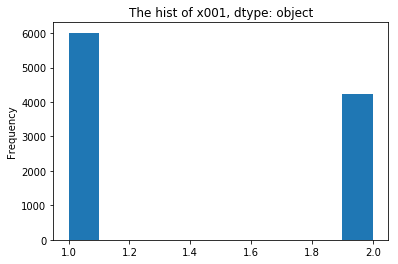

x001 [1 2] 2


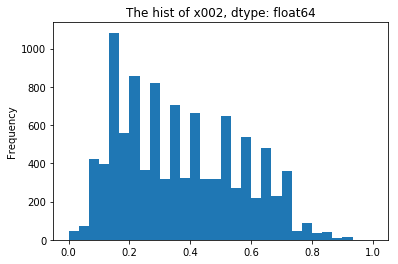

x002 43
count    10232.000000
mean         0.365171
std          0.196054
min          0.000000
25%          0.181818
50%          0.340909
75%          0.522727
max          1.000000
Name: x002, dtype: float64


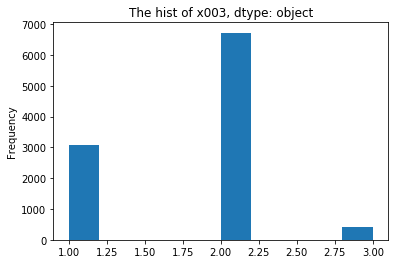

x003 [2 1 3] 3


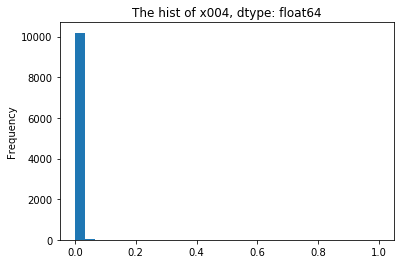

x004 182
count    10232.000000
mean         0.001761
std          0.011927
min          0.000000
25%          0.000618
50%          0.000909
75%          0.001309
max          1.000000
Name: x004, dtype: float64


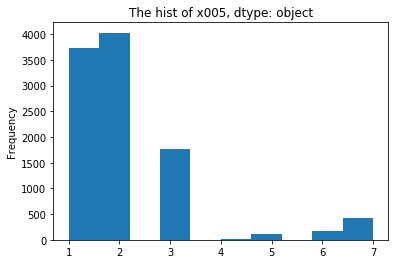

x005 [1 2 3 5 7 6 4] 7


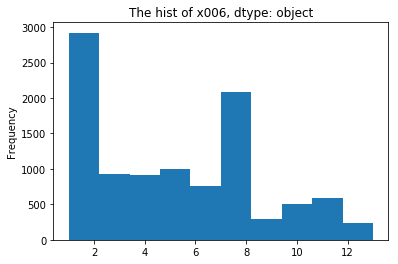

x006 [6 1 7 8 9 5 10 4 3 12 11 2 13] 13


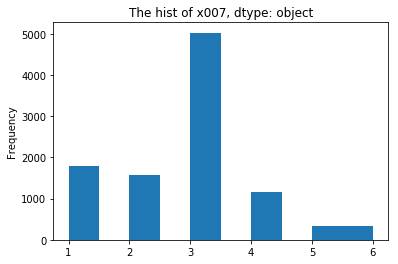

x007 [5 1 3 6 4 2] 6


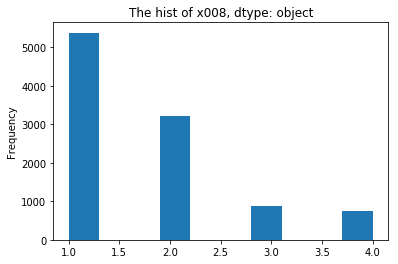

x008 [1 2 3 4] 4


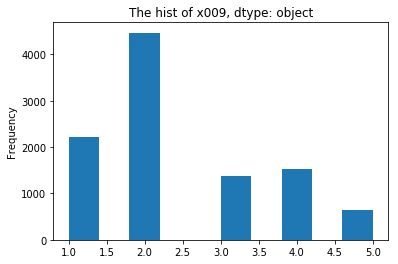

x009 [1 2 4 3 5] 5


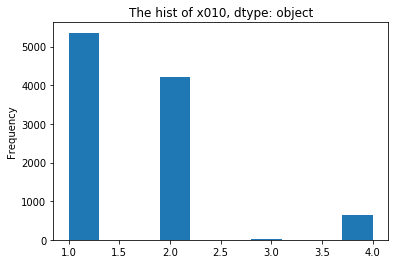

x010 [2 1 4 3] 4


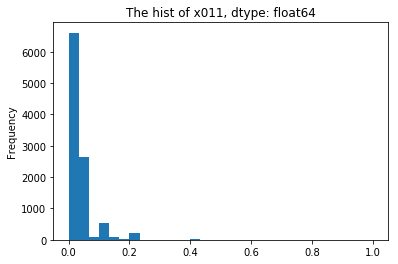

x011 76
count    10232.000000
mean         0.037929
std          0.044261
min          0.000000
25%          0.016000
50%          0.024000
75%          0.040000
max          1.000000
Name: x011, dtype: float64


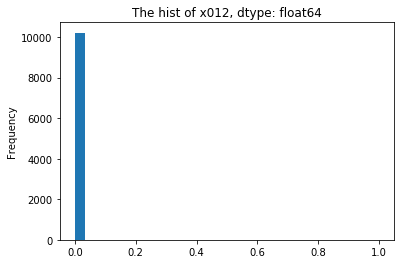

x012 13
count    10232.000000
mean         0.000799
std          0.020356
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x012, dtype: float64


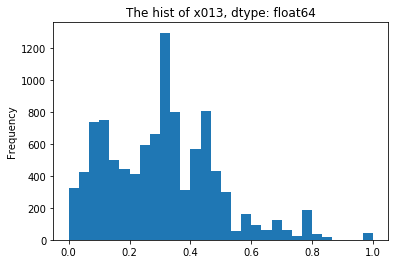

x013 55
count    10232.000000
mean         0.307338
std          0.181324
min          0.000000
25%          0.158730
50%          0.301587
75%          0.428571
max          1.000000
Name: x013, dtype: float64


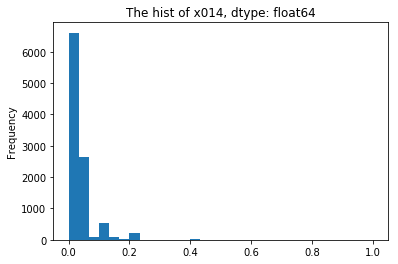

x014 78
count    10232.000000
mean         0.037944
std          0.044286
min          0.000000
25%          0.016000
50%          0.024000
75%          0.040000
max          1.000000
Name: x014, dtype: float64


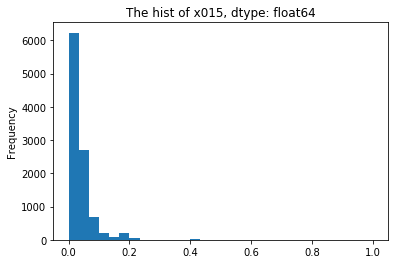

x015 126
count    10232.000000
mean         0.039927
std          0.058080
min          0.000000
25%          0.016364
50%          0.027273
75%          0.045455
max          1.000000
Name: x015, dtype: float64


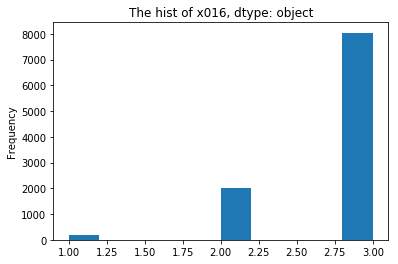

x016 [2 3 1] 3


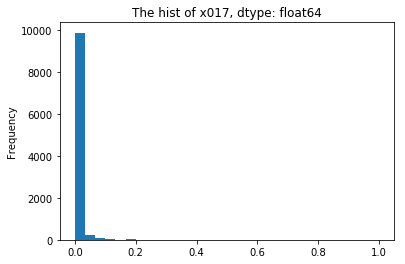

x017 4101
count    10232.000000
mean         0.006833
std          0.020426
min          0.000000
25%          0.001570
50%          0.001789
75%          0.004864
max          1.000000
Name: x017, dtype: float64


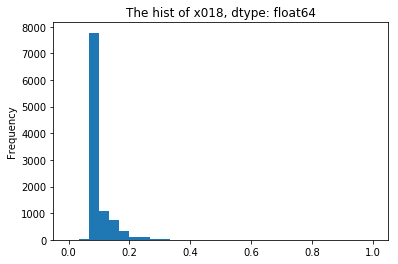

x018 40
count    10232.000000
mean         0.097336
std          0.042087
min          0.000000
25%          0.074074
50%          0.086420
75%          0.098765
max          1.000000
Name: x018, dtype: float64


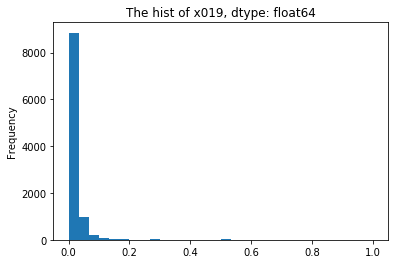

x019 4166
count    10232.000000
mean         0.032961
std          0.031623
min          0.000000
25%          0.026048
50%          0.026426
75%          0.028719
max          1.000000
Name: x019, dtype: float64


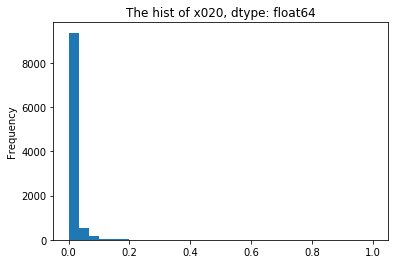

x020 97
count    10232.000000
mean         0.007416
std          0.028326
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x020, dtype: float64


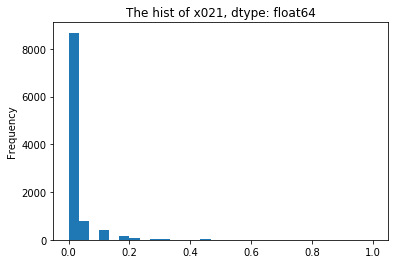

x021 15
count    10232.000000
mean         0.017022
std          0.052084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x021, dtype: float64


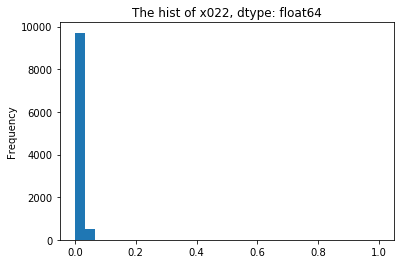

x022 147
count    10232.000000
mean         0.004162
std          0.015244
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x022, dtype: float64


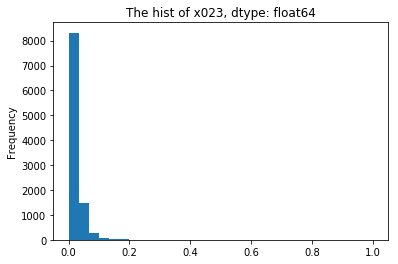

x023 1696
count    10232.000000
mean         0.033547
std          0.026243
min          0.000000
25%          0.026820
50%          0.026820
75%          0.026820
max          1.000000
Name: x023, dtype: float64


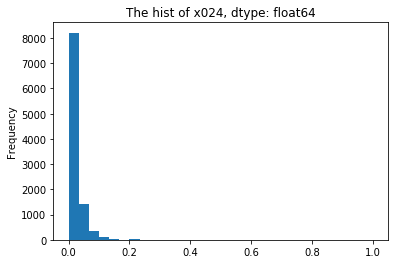

x024 21
count    10232.000000
mean         0.029158
std          0.031497
min          0.000000
25%          0.018182
50%          0.018182
75%          0.018182
max          1.000000
Name: x024, dtype: float64


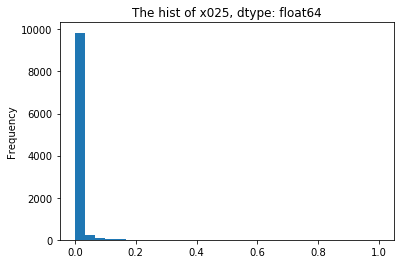

x025 1701
count    10232.000000
mean         0.005538
std          0.022944
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x025, dtype: float64


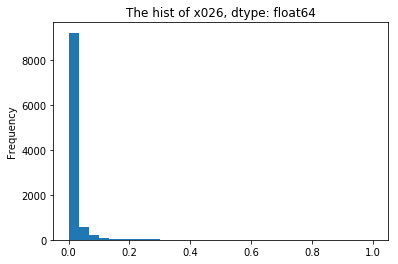

x026 8479
count    10232.000000
mean         0.015521
std          0.038490
min          0.000000
25%          0.001385
50%          0.004933
75%          0.013739
max          1.000000
Name: x026, dtype: float64


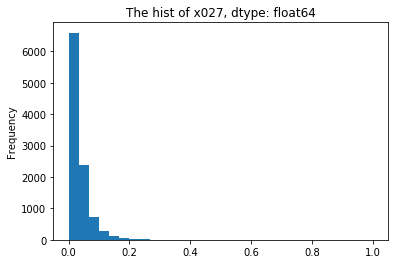

x027 110
count    10232.000000
mean         0.034248
std          0.037726
min          0.000000
25%          0.011092
50%          0.022353
75%          0.042017
max          1.000000
Name: x027, dtype: float64


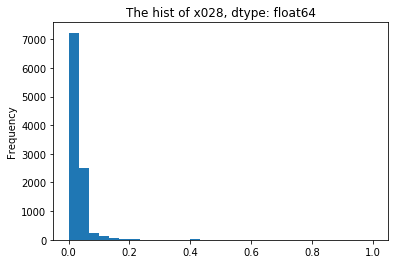

x028 8616
count    10232.000000
mean         0.037481
std          0.030788
min          0.000000
25%          0.028027
50%          0.029812
75%          0.035033
max          1.000000
Name: x028, dtype: float64


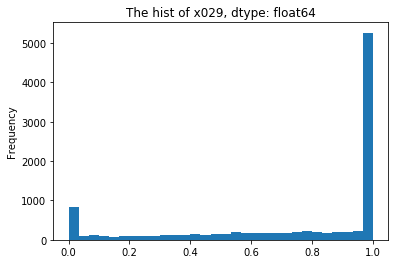

x029 4376
count    10232.000000
mean         0.744856
std          0.343126
min          0.000000
25%          0.539101
50%          0.985891
75%          1.000000
max          1.000000
Name: x029, dtype: float64


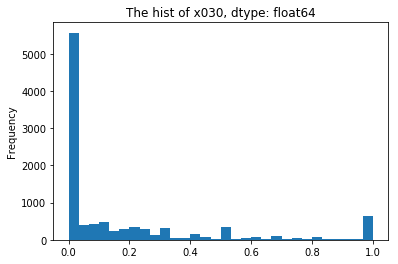

x030 378
count    10232.000000
mean         0.170697
std          0.282012
min          0.000000
25%          0.000000
50%          0.000000
75%          0.222200
max          1.000000
Name: x030, dtype: float64


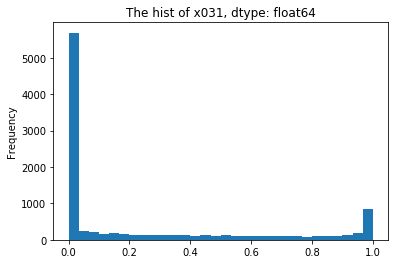

x031 4155
count    10232.000000
mean         0.245356
std          0.352225
min          0.000000
25%          0.000000
50%          0.000000
75%          0.462328
max          1.000000
Name: x031, dtype: float64


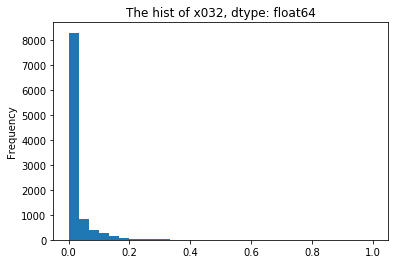

x032 389
count    10232.000000
mean         0.022654
std          0.055069
min          0.000000
25%          0.000000
50%          0.000000
75%          0.020619
max          1.000000
Name: x032, dtype: float64


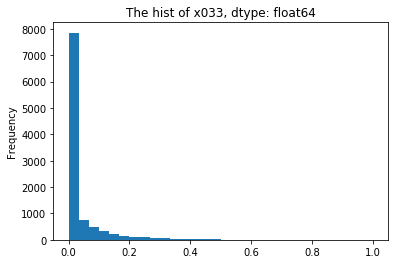

x033 48
count    10232.000000
mean         0.036508
std          0.079253
min          0.000000
25%          0.000000
50%          0.000000
75%          0.032448
max          1.000000
Name: x033, dtype: float64


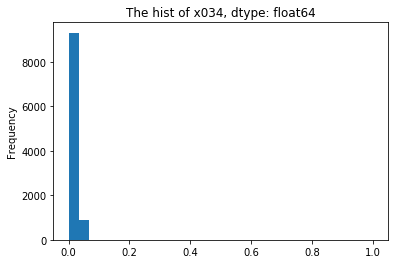

x034 834
count    10232.000000
mean         0.009165
std          0.019974
min          0.000000
25%          0.000000
50%          0.000000
75%          0.014815
max          1.000000
Name: x034, dtype: float64


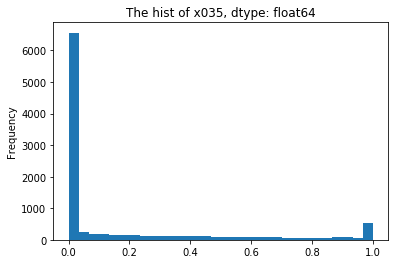

x035 3415
count    10232.000000
mean         0.174741
std          0.303733
min          0.000000
25%          0.000000
50%          0.000000
75%          0.233541
max          1.000000
Name: x035, dtype: float64


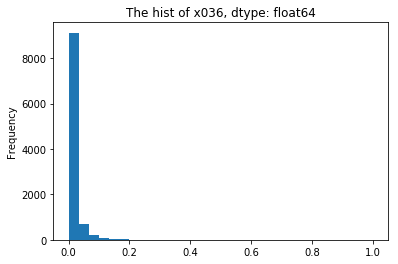

x036 2286
count    10232.000000
mean         0.011385
std          0.040107
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x036, dtype: float64


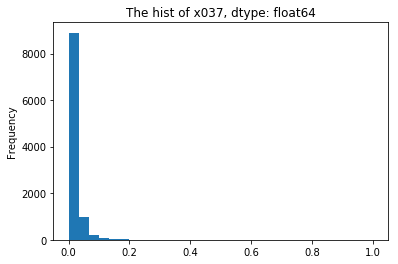

x037 70
count    10232.000000
mean         0.009868
std          0.028347
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x037, dtype: float64


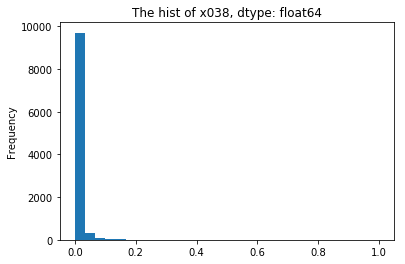

x038 2255
count    10232.000000
mean         0.007543
std          0.030891
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x038, dtype: float64


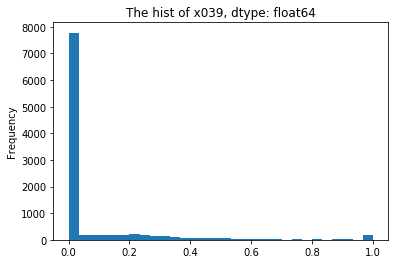

x039 2328
count    10232.000000
mean         0.080403
std          0.194301
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x039, dtype: float64


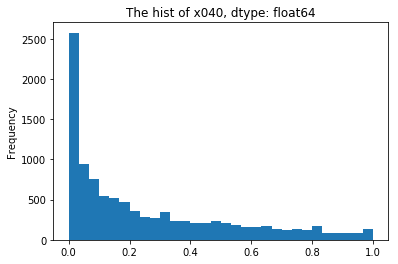

x040 4927
count    10232.000000
mean         0.256993
std          0.271165
min          0.000000
25%          0.033200
50%          0.153950
75%          0.418800
max          1.000000
Name: x040, dtype: float64


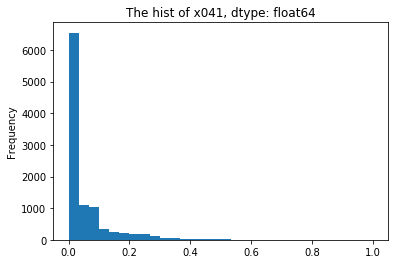

x041 2347
count    10232.000000
mean         0.049960
std          0.090413
min          0.000000
25%          0.000000
50%          0.006785
75%          0.067702
max          1.000000
Name: x041, dtype: float64


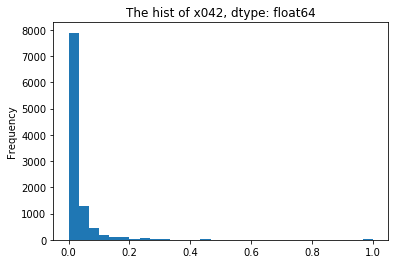

x042 6821
count    10232.000000
mean         0.032557
std          0.074059
min          0.000000
25%          0.004842
50%          0.012941
75%          0.030987
max          1.000000
Name: x042, dtype: float64


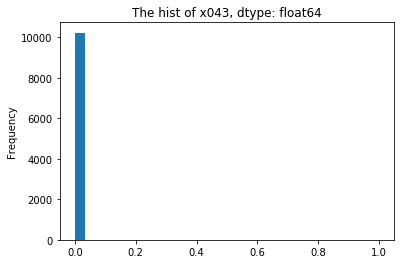

x043 8635
count    10232.000000
mean         0.000362
std          0.010328
min          0.000000
25%          0.000074
50%          0.000099
75%          0.000135
max          1.000000
Name: x043, dtype: float64


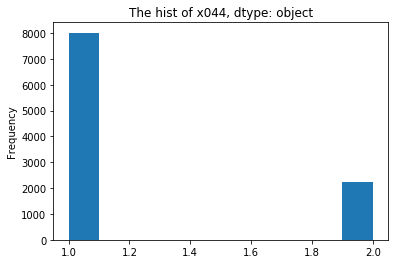

x044 [2 1] 2


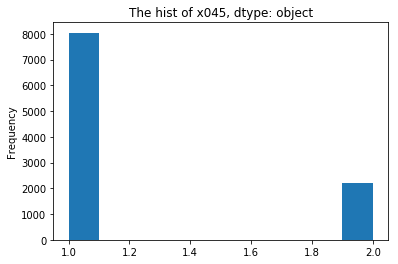

x045 [2 1] 2


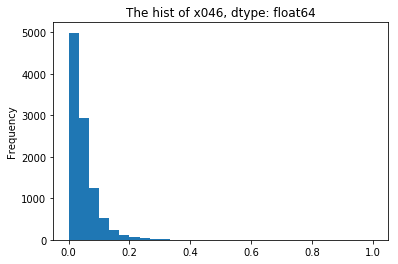

x046 232
count    10232.000000
mean         0.049448
std          0.049613
min          0.000000
25%          0.019282
50%          0.035904
75%          0.063664
max          1.000000
Name: x046, dtype: float64


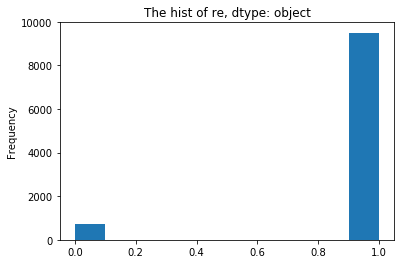

re [1 0] 2


In [42]:
for i in data_ad.columns:
    if data_ad[i].dtype == 'object':
        #print (i)
        data_ad[i].astype(int).plot.hist()
        plt.title("The hist of {}, dtype: {}".format(i, data_ad[i].dtype))
        plt.show()
        print (i, data_ad[i].unique(), len(data_ad[i].unique()))
    elif data_ad[i].dtype == 'float64':
        data_ad[i].plot.hist(30)
        plt.title("The hist of {}, dtype: {}".format(i, data_ad[i].dtype))
        plt.show()
        print (i, len(data_ad[i].unique()))
        print (data_ad[i].describe())
       
        
    

In [69]:
for i in data_ad.columns:
    if data_ad[i].dtype == 'float64' and len(data_ad[i].unique()) <= 40:
        print (i, len(data_ad[i].unique()))

x012 13
x018 40
x021 15
x024 21


In [68]:
#data['x002']
income = pd.cut(data['x002'], 5)
for i in income.unique():

    print (sum(income == i), i)


2751 (0.4, 0.6]
3386 (0.2, 0.4]
1413 (0.6, 0.8]
2578 (-0.001, 0.2]
104 (0.8, 1.0]


观察连续变量分布，并没有发现变量中有不符合数据分布规律，或者不符合实际情况的异常值。

Did not identify any abnormal value or outlier in the dataset.

# 分类变量码值数量  variables' unqiue value count

In [11]:
for i in data.columns:
    if data[i].dtype == 'object':
        print (i,len(data[i].unique()), data[i].dtype)

x001 2 object
x003 3 object
x005 7 object
x006 13 object
x007 6 object
x008 4 object
x009 5 object
x010 4 object
x016 3 object
x044 2 object
x045 2 object
re 2 object


所有分类变量的可能值。

分类变量对应的中文名称：

x001 - 性别

x002 - 收入

x003 - 婚姻状况

x005 - 受教育程度

x006 - 单位性质代码

x007 - 行业类型代码

x008 - 与我行关系代码

x009 - 进件来源代码

x010 - 产品编号

x016 - 卡片种类

x044 - 是否关联还款

x045 - 最近6期是否发生过逾期

分类变量均为无序性分类变量，将无序分类变量转换为哑变量的时候不会产生信息损失。

# 变量类型转换 Label encode/One-hot encode categorical data

In [120]:
le = LabelEncoder()
count = 0  
# Label encode categorical varaibles with less than 3 values
for col in data_ad:
    if data_ad[col].dtype == 'object':
        if len(list(data_ad[col].unique())) <=2:
            le.fit(data_ad[col])
            data_ad[col] = le.transform(data_ad[col])
#            data[col] = le.transform(data[col])
            count = count + 1
    
print("%d 列特征是label编码"%count)


# One-hot encode variables
# Change nominal variables contain more than 2 values to dummy variables
data_ad = pd.get_dummies(data_ad)

4 列特征是label编码


In [121]:
data_ad

,x001,x002,x004,x011,x012,x013,x014,x015,x017,x018,...,x009_3,x009_4,x009_5,x010_1,x010_2,x010_3,x010_4,x016_1,x016_2,x016_3
0,0,0.431818,0.005455,0.020,0.0,0.095238,0.020,0.018182,0.018003,0.086420,...,0,0,0,0,1,0,0,0,1,0
1,0,0.227273,0.001455,0.013,0.0,0.142857,0.013,0.011818,0.004247,0.086420,...,0,0,0,1,0,0,0,0,1,0
2,1,0.363636,0.000909,0.018,0.0,0.396825,0.018,0.016364,0.001570,0.074074,...,0,0,0,1,0,0,0,0,0,1
3,0,0.522727,0.003636,0.054,0.0,0.396825,0.054,0.049091,0.001570,0.074074,...,0,0,0,1,0,0,0,0,0,1
4,0,0.727273,0.018182,0.060,0.0,0.269841,0.060,0.054545,0.001570,0.074074,...,0,0,0,0,1,0,0,0,0,1
5,0,0.363636,0.001818,0.012,0.0,0.365079,0.012,0.010909,0.004688,0.111111,...,0,0,0,1,0,0,0,0,0,1
6,1,0.204545,0.000618,0.012,0.0,0.301587,0.012,0.010909,0.011219,0.234568,...,0,0,0,1,0,0,0,0,0,1
7,1,0.409091,0.002364,0.050,0.0,0.444444,0.050,0.045455,0.045420,0.172840,...,0,0,0,0,1,0,0,0,0,1
8,1,0.613636,0.000909,0.060,0.0,0.301587,0.060,0.054545,0.001570,0.074074,...,0,0,0,0,1,0,0,0,1,0
9,0,0.159091,0.000873,0.020,0.0,0.269841,0.020,0.018182,0.002957,0.135802,...,0,0,0,1,0,0,0,0,0,1


# 找到和目标变量关联性强的变量 

Identify the variables with highest/lowest correlation with the target variable

In [20]:
corr_sort = data_ad.corr()['re'].sort_values()
# Looking for the 10 most positive/negative correlation with the target variable
print('Ten features with the highest corr：\n',corr_sort.tail(11))
print('Ten features with the lowest corr：\n',corr_sort.head(10))

Ten features with the highest corr：
 x014      0.051987
x015      0.052440
x001      0.058167
x006_8    0.060222
x003_2    0.066866
x045      0.067385
x016_2    0.074159
x002      0.096968
x044      0.116078
x029      0.169125
re        1.000000
Name: re, dtype: float64
Ten features with the lowest corr：
 x041     -0.385241
x040     -0.267291
x033     -0.199282
x032     -0.164646
x021     -0.164218
x035     -0.163805
x020     -0.121111
x022     -0.112357
x034     -0.091406
x003_1   -0.078356
Name: re, dtype: float64


The variables x029, x044 have the highest correlation. The variables x041, x040 have the lowest correlation.
For categorical variables, x016_2, x003_2, x006_8 have the highest correlation. x003_1 has the lowest correlation.

根据相关性系数排序，分类变量中x003（婚姻状况）, x006（单位性质）和 x016（卡片种类）和客户违约状况有统计显著的关系。


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


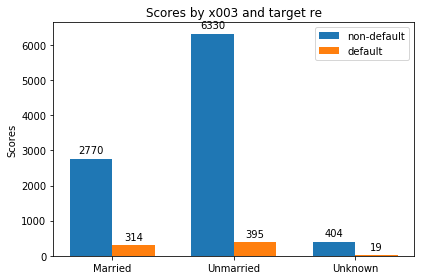

In [22]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')



x003_1 = [len(data[data['x003'] == 1][data['re'] == 1]), len(data[data['x003'] == 2][data['re'] == 1]), 
          len(data[data['x003'] == 3][data['re'] == 1])]
x003_0 = [len(data[data['x003'] == 1][data['re'] == 0]), len(data[data['x003'] == 2][data['re'] == 0]), 
          len(data[data['x003'] == 3][data['re'] == 0])]

labels = ['Married','Unmarried', 'Unknown']

x = np.arange(len(x003_1))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, x003_1, width, label='non-default')
rects2 = ax.bar(x + width/2, x003_0, width, label='default')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by {} and target re'.format('x003'))
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

未婚用户相较已婚客户，拥有相对更低的信贷违约率。

Comparing to married group of people, unmarried group has statistical significantly lower possibility of defaulting.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


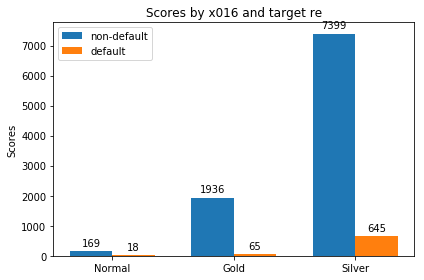

In [23]:

x016_1 = [len(data[data['x016'] == 1][data['re'] == 1]), len(data[data['x016'] == 2][data['re'] == 1]), 
          len(data[data['x016'] == 3][data['re'] == 1])]
x016_0 = [len(data[data['x016'] == 1][data['re'] == 0]), len(data[data['x016'] == 2][data['re'] == 0]), 
          len(data[data['x016'] == 3][data['re'] == 0])]

labels = ['Normal', 'Gold', 'Silver']

x = np.arange(len(x016_1))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, x016_1, width, label='non-default')
rects2 = ax.bar(x + width/2, x016_0, width, label='default')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by {} and target re'.format('x016'))
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

金卡客户相较普通客户和银卡客户，拥有统计显著更低的违约率。

Comparing to silver accounts and normal accounts， gold accounts have lower possibilities of defaulting.

和目标变量相关性最高的变量之间的关联矩阵

Plotting the correlation matrix of the most correlated variables

In [87]:

dt = data_ad[['x001', 'x002', 'x003_1','x003_2', 'x006_8','x014', 'x015', 'x016_2', 'x020', 'x021', 
                   'x022', 'x029', 'x032', 'x033', 'x034', 'x035',
                   'x040','x041', 'x044', 'x045']]

corr_mat = dt.corr()

print (corr_mat)

            x001      x002    x003_1    x003_2    x006_8      x014      x015  \
x001    1.000000 -0.060140  0.009847 -0.024369  0.152614 -0.062532 -0.037529   
x002   -0.060140  1.000000 -0.631361  0.565892 -0.064484  0.228483  0.206967   
x003_1  0.009847 -0.631361  1.000000 -0.909585  0.122578 -0.157707 -0.135711   
x003_2 -0.024369  0.565892 -0.909585  1.000000 -0.149743  0.123703  0.089429   
x006_8  0.152614 -0.064484  0.122578 -0.149743  1.000000  0.141615  0.206712   
x014   -0.062532  0.228483 -0.157707  0.123703  0.141615  1.000000  0.853918   
x015   -0.037529  0.206967 -0.135711  0.089429  0.206712  0.853918  1.000000   
x016_2  0.032299  0.129084 -0.083295  0.048198  0.145650  0.200787  0.238452   
x020   -0.066138 -0.003002  0.026045 -0.018234 -0.054603 -0.013676 -0.023162   
x021   -0.079260 -0.066915  0.073403 -0.064683 -0.064496 -0.053857 -0.056733   
x022   -0.047682 -0.024601  0.028493 -0.022955 -0.045953 -0.034769 -0.036224   
x029    0.100068  0.148036 -0.130108  0.

Text(0.5, 1.0, 'Correlation Heatmap')

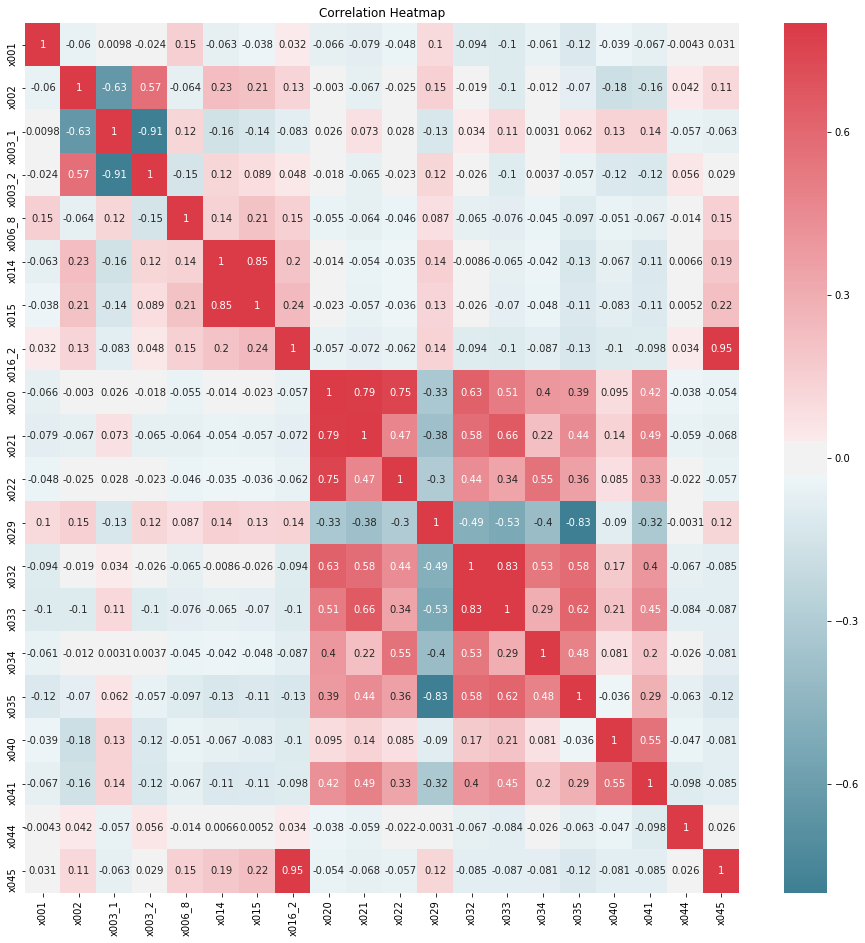

In [88]:
plt.figure(figsize = (16,16))
sns.heatmap(corr_mat, cmap = sns.diverging_palette(220, 10, as_cmap=True), vmin = -0.8, annot = True, vmax = 0.8)
plt.title('Correlation Heatmap')

检测变量之间的多重共线性

In [83]:
dt = data_ad[['x001', 'x002', 'x014', 'x015', 'x020', 'x021', 
                   'x022', 'x029', 'x032', 'x033', 'x034', 'x035',
                   'x040','x041', 'x044', 'x045']]

# data[dt.columns[1]]
st,pv = ss.bartlett(dt['x015'], dt['x014'])
print ("p-value of x015 and x014 is {}".format(pv))

st,pv = ss.bartlett(dt['x020'], dt['x021'])
print ("p-value of x020 and x021 is {}".format(pv))

st,pv = ss.bartlett(dt['x020'], dt['x022'])
print ("p-value of x020 and x022 is {}".format(pv))

st,pv = ss.bartlett(dt['x029'], dt['x035'])
print ("p-value of x029 and x035 is {}".format(pv))

st,pv = ss.bartlett(dt['x033'], dt['x032'])
print ("p-value of x033 and x032 is {}".format(pv))
#ss.bartlett(dt[dt.columns[2]], dt[dt.columns[1]])



p-value of x015 and x014 is 1.2439674949174837e-163
p-value of x020 and x021 is 0.0
p-value of x020 and x022 is 0.0
p-value of x029 and x035 is 7.10059282942598e-35
p-value of x033 and x032 is 1.5319389539830517e-290


In [90]:
chi_square_value,p_value=calculate_bartlett_sphericity(dt)
chi_square_value, p_value

(139648.04867541065, 0.0)

p < .5 Bartlett test of sphericity 发现变量之间并不存在多重共线性， 各个变量方差之间存在显著差异。

In [91]:
kmo_all,kmo_model = calculate_kmo(dt)
kmo_model

0.6663973489558999

KMO test 发现结果说明有factor analysis的必要